# Install & Import Dependencies

In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Correlation matrices in range [-1, 1]
def get_correlation_matrix(df, corr_method, threshold=0.75, show=True):
    corr = df.corr(method=corr_method)

    # Return pair of features with correlation above threshold
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column].abs() > threshold)]
    
    if show:
        fig, ax = plt.subplots(figsize=(12, 12))
        cax = ax.matshow(corr, cmap="coolwarm")
        fig.colorbar(cax)
        
        plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
        plt.yticks(range(len(corr.columns)), corr.columns)
        
        plt.title(f"Correlation Matrix ({corr_method.capitalize()})")
        plt.show()

    return corr, to_drop

def drop_correlated_features(df, threshold):
    to_drop_set = None
    for method in ["pearson", "kendall", "spearman"]:
        _, to_drop = get_correlation_matrix(df, method, threshold=threshold, show=False)
        if to_drop_set is None:
            to_drop_set = set(to_drop)
        else:
            to_drop_set = to_drop_set.intersection(to_drop)
        
    print(f"Features to drop with correlation above {threshold} for all methods: {sorted(to_drop_set)}")
    dropped_df = df.drop(to_drop_set, axis=1)
    return dropped_df

def show_comparison_correlation_matrices(df, dropped_df, threshold=0.75):
    print(f"Number of features before dropping: {df.shape[1]}")
    print(f"Number of features after dropping: {dropped_df.shape[1]}")
    print(f"Dropped features: {sorted(set(df.columns) - set(dropped_df.columns))}")

    # Plot correlation matrices before and after dropping highly correlated features for all methods in each row
    fig, axes = plt.subplots(3, 2, figsize=(24, 36))

    for i, method in enumerate(["pearson", "kendall", "spearman"]):
        for j, df, title in zip([0, 1], [df, dropped_df], ["Before Dropping", "After Dropping"]):
            corr, _ = get_correlation_matrix(df, method, threshold=threshold, show=False)
            cax = axes[i, j].matshow(corr, cmap="coolwarm")
            fig.colorbar(cax, ax=axes[i, j])
            axes[i, j].set_xticks(range(len(corr.columns)))
            axes[i, j].set_yticks(range(len(corr.columns)))
            axes[i, j].set_xticklabels(corr.columns, rotation=90)
            axes[i, j].set_yticklabels(corr.columns)
            axes[i, j].set_title(f"Correlation Matrix ({method.capitalize()}) {title}")

# Breast Cancer Wisconsin (Diagnostic)

In [3]:
# Fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 

In [ ]:
breast_cancer_wisconsin_diagnostic.metadata

In [ ]:
breast_cancer_wisconsin_diagnostic.variables

In [33]:
# Retrieve original dataset
original_df = breast_cancer_wisconsin_diagnostic.data.original
original_df

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


In [64]:
# Rename columns
renamed_df = original_df.rename({
    "ID": "id",
    "Diagnosis": "diagnosis",
    "radius1": "mean_radius",
    "texture1": "mean_texture",
    "perimeter1": "mean_perimeter",
    "area1": "mean_area",
    "smoothness1": "mean_smoothness",
    "compactness1": "mean_compactness",
    "concavity1": "mean_concavity",
    "concave_points1": "mean_concave_points",
    "symmetry1": "mean_symmetry",
    "fractal_dimension1": "mean_fractal_dimension",
    "radius2": "se_radius",
    "texture2": "se_texture",
    "perimeter2": "se_perimeter",
    "area2": "se_area",
    "smoothness2": "se_smoothness",
    "compactness2": "se_compactness",
    "concavity2": "se_concavity",
    "concave_points2": "se_concave_points",
    "symmetry2": "se_symmetry",
    "fractal_dimension2": "se_fractal_dimension",
    "radius3": "worst_radius",
    "texture3": "worst_texture",
    "perimeter3": "worst_perimeter",
    "area3": "worst_area",
    "smoothness3": "worst_smoothness",
    "compactness3": "worst_compactness",
    "concavity3": "worst_concavity",
    "concave_points3": "worst_concave_points",
    "symmetry3": "worst_symmetry",
    "fractal_dimension3": "worst_fractal_dimension"
}, axis=1)
renamed_df

,id,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


In [65]:
# Transform diagnosis column to binary
renamed_df['diagnosis'] = renamed_df['diagnosis'].map({'M': 1, 'B': 0})

# Drop id column
renamed_df = renamed_df.drop('id', axis=1)

In [66]:
# Check for missing values
has_missing_values = renamed_df.isnull().sum().any()
print(f"Dataset has missing values: {has_missing_values}")

# Check for duplicates
has_duplicates = renamed_df.duplicated().any()
print(f"Dataset has duplicates: {has_duplicates}")

False

In [68]:
# Summary statistics
renamed_df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


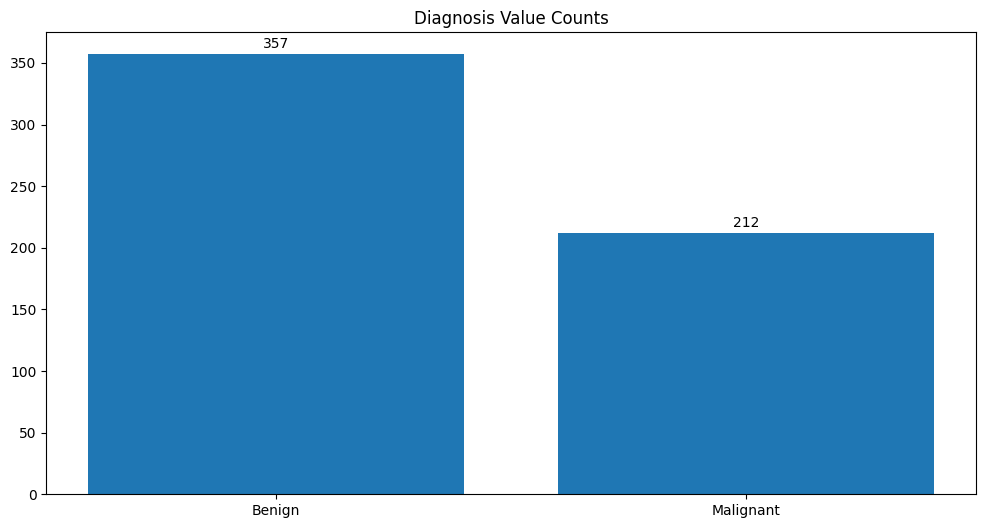

In [69]:
# Check for class imbalance.
value_counts = renamed_df["diagnosis"].value_counts()
value_counts.index = value_counts.index.map({1: "Malignant", 0: "Benign"})

fig = plt.figure(figsize=(12, 6))
plt.bar(value_counts.index, value_counts.values)

for i, value in enumerate(value_counts.values):
    plt.text(i, value + 5, str(value), ha="center")

plt.title("Diagnosis Value Counts")
plt.show()

In [125]:
renamed_df.to_csv('data/breast-cancer-wisconsin-diagnostic/full-data.csv', index=False)

Features to drop with correlation above 0.75 for all methods: ['mean_area', 'mean_concave_points', 'mean_perimeter', 'se_area', 'se_perimeter', 'worst_area', 'worst_concave_points', 'worst_concavity', 'worst_perimeter', 'worst_radius']
Number of features before dropping: 31
Number of features after dropping: 21
Dropped features: ['mean_area', 'mean_concave_points', 'mean_perimeter', 'se_area', 'se_perimeter', 'worst_area', 'worst_concave_points', 'worst_concavity', 'worst_perimeter', 'worst_radius']


,mean_radius,mean_texture,mean_smoothness,mean_compactness,mean_concavity,mean_symmetry,mean_fractal_dimension,se_radius,se_texture,se_smoothness,...,se_concavity,se_concave_points,se_symmetry,se_fractal_dimension,worst_texture,worst_smoothness,worst_compactness,worst_symmetry,worst_fractal_dimension,diagnosis
0,17.99,10.38,0.11840,0.27760,0.30010,0.2419,0.07871,1.0950,0.9053,0.006399,...,0.05373,0.01587,0.03003,0.006193,17.33,0.16220,0.66560,0.4601,0.11890,1
1,20.57,17.77,0.08474,0.07864,0.08690,0.1812,0.05667,0.5435,0.7339,0.005225,...,0.01860,0.01340,0.01389,0.003532,23.41,0.12380,0.18660,0.2750,0.08902,1
2,19.69,21.25,0.10960,0.15990,0.19740,0.2069,0.05999,0.7456,0.7869,0.006150,...,0.03832,0.02058,0.02250,0.004571,25.53,0.14440,0.42450,0.3613,0.08758,1
3,11.42,20.38,0.14250,0.28390,0.24140,0.2597,0.09744,0.4956,1.1560,0.009110,...,0.05661,0.01867,0.05963,0.009208,26.50,0.20980,0.86630,0.6638,0.17300,1
4,20.29,14.34,0.10030,0.13280,0.19800,0.1809,0.05883,0.7572,0.7813,0.011490,...,0.05688,0.01885,0.01756,0.005115,16.67,0.13740,0.20500,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.24390,0.1726,0.05623,1.1760,1.2560,0.010300,...,0.05198,0.02454,0.01114,0.004239,26.40,0.14100,0.21130,0.2060,0.07115,1
565,20.13,28.25,0.09780,0.10340,0.14400,0.1752,0.05533,0.7655,2.4630,0.005769,...,0.03950,0.01678,0.01898,0.002498,38.25,0.11660,0.19220,0.2572,0.06637,1
566,16.60,28.08,0.08455,0.10230,0.09251,0.1590,0.05648,0.4564,1.0750,0.005903,...,0.04730,0.01557,0.01318,0.003892,34.12,0.11390,0.30940,0.2218,0.07820,1
567,20.60,29.33,0.11780,0.27700,0.35140,0.2397,0.07016,0.7260,1.5950,0.006522,...,0.07117,0.01664,0.02324,0.006185,39.42,0.16500,0.86810,0.4087,0.12400,1


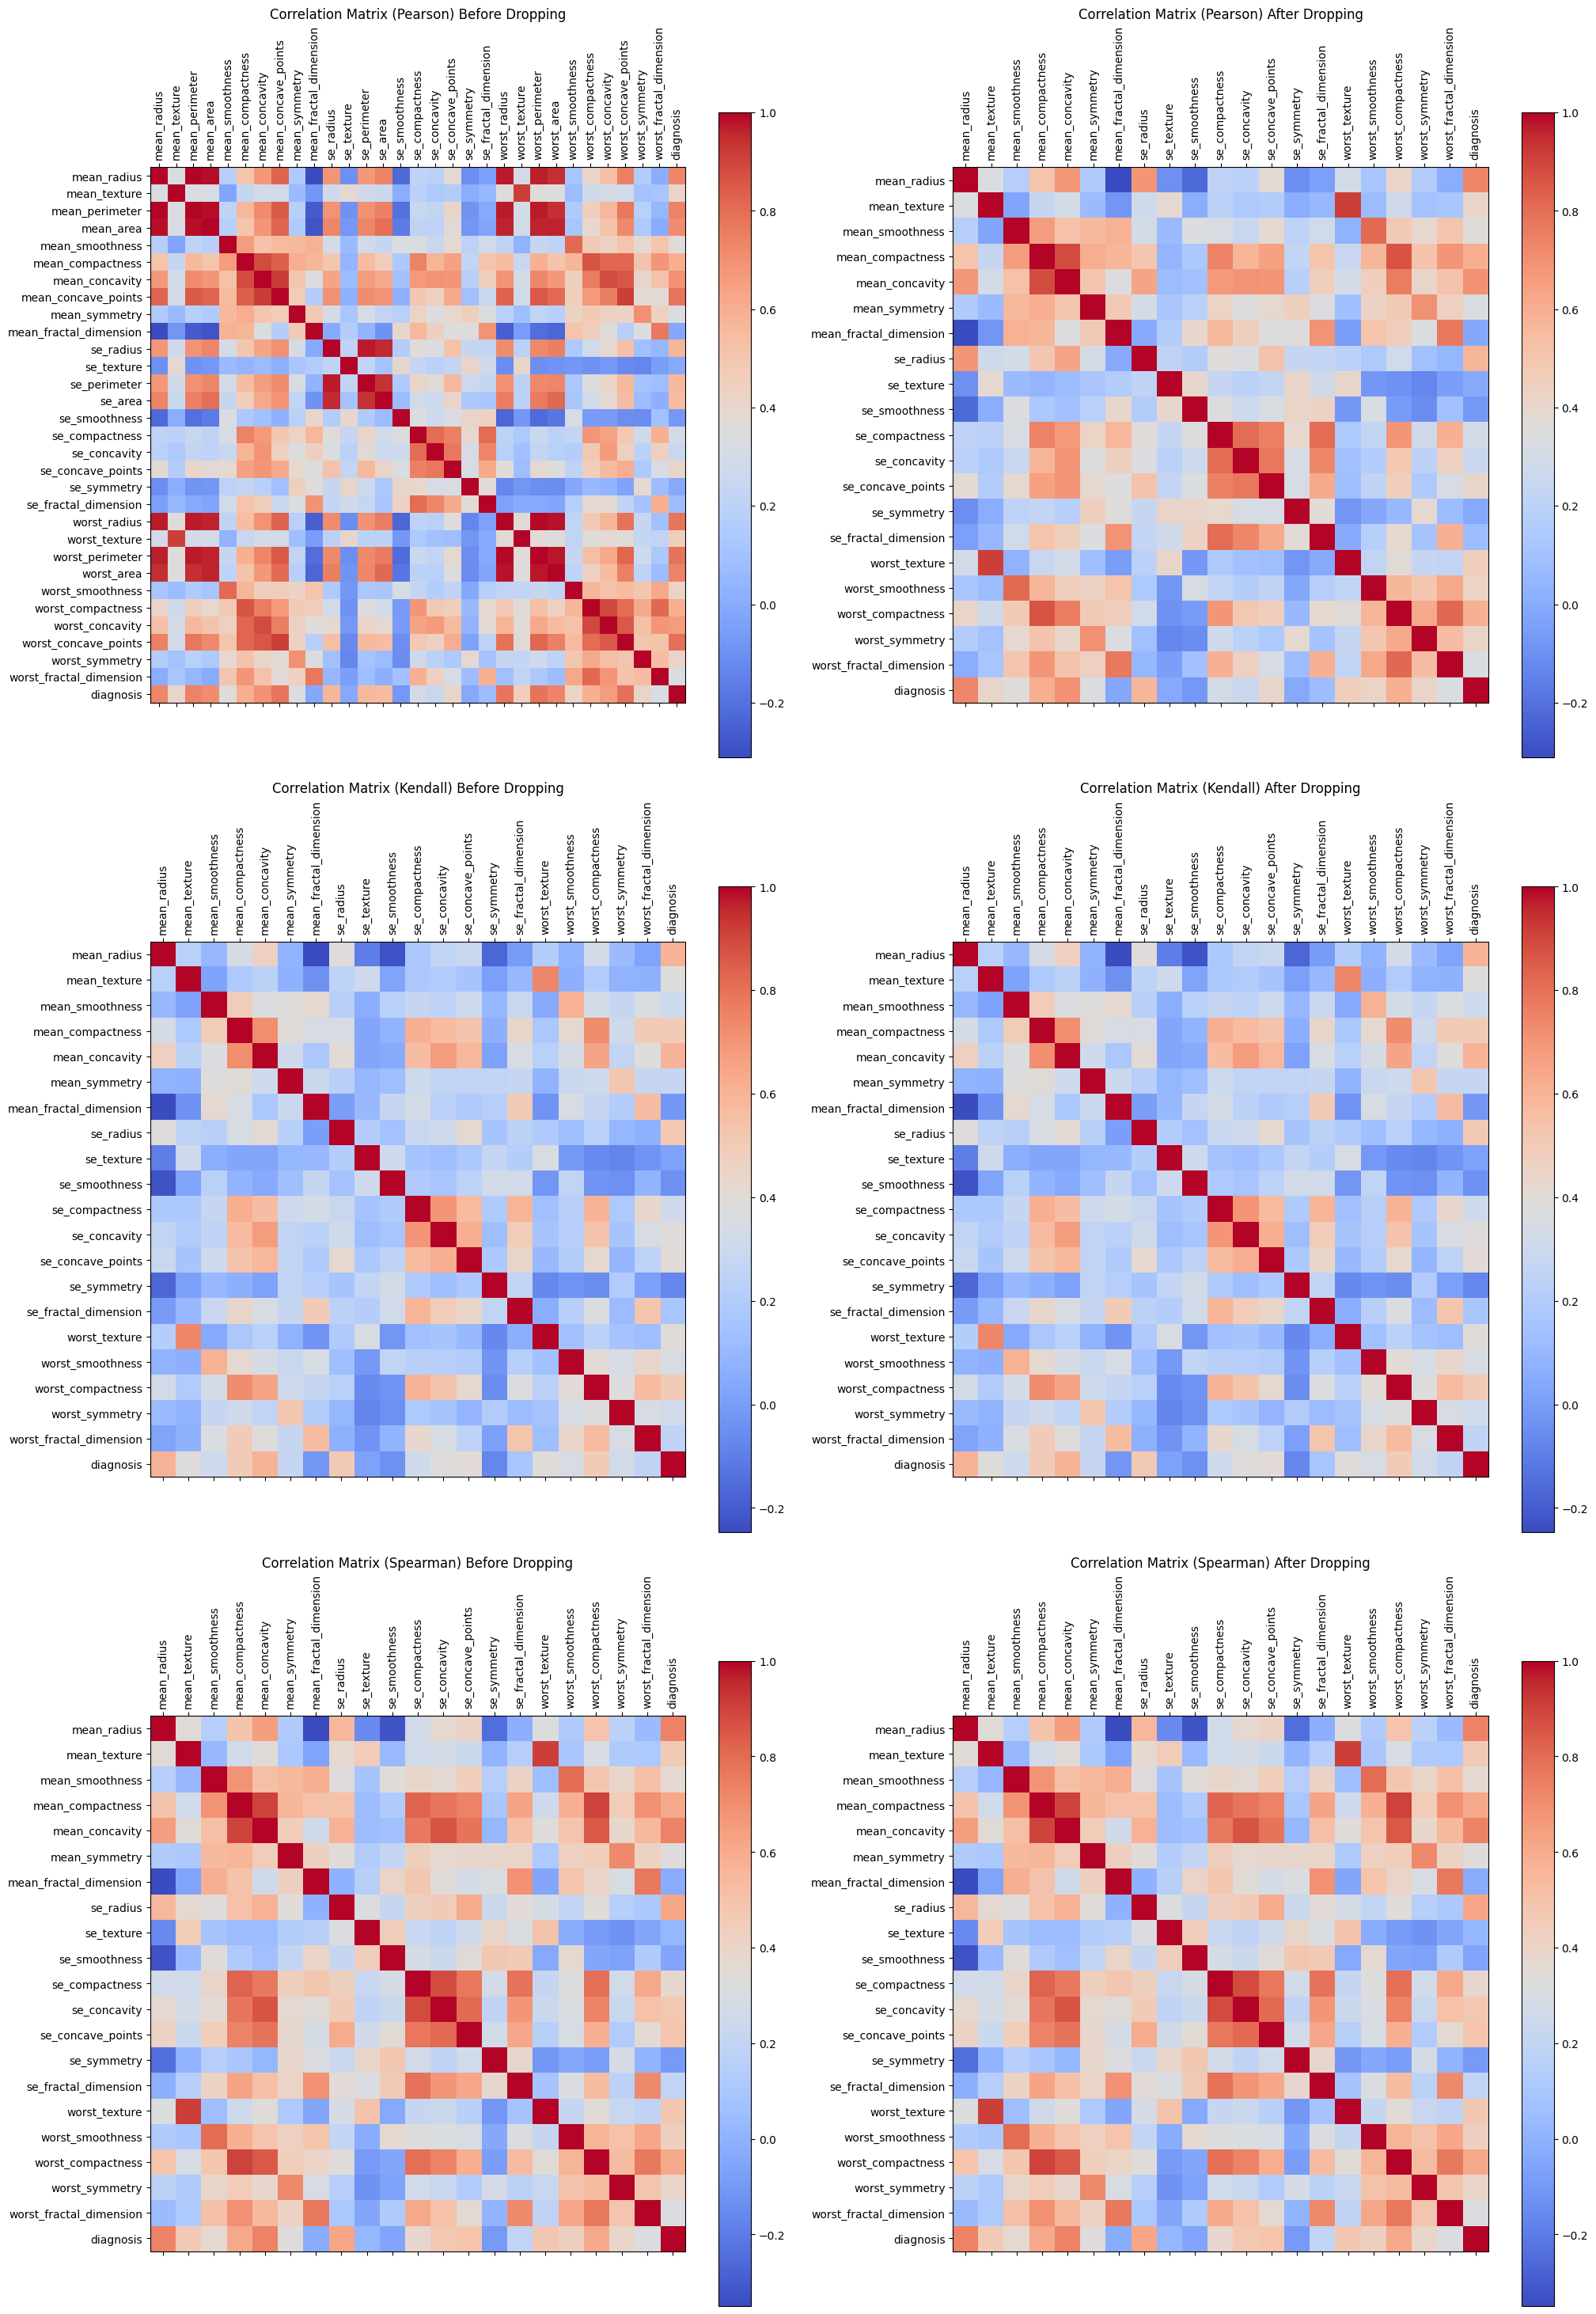

In [120]:
# Plot correlation matrices and drop highly correlated features
threshold = 0.75
dropped_df = drop_correlated_features(renamed_df, threshold=threshold)
show_comparison_correlation_matrices(renamed_df, dropped_df, threshold=threshold)
dropped_df

In [123]:
dropped_df.to_csv('data/breast-cancer-wisconsin-diagnostic/no-correlation.csv', index=False)

In [150]:
# Normalize data except for diagnosis column
normalized_df = dropped_df.copy()
normalized_df.iloc[:, :-1] = (normalized_df.iloc[:, :-1] - normalized_df.iloc[:, :-1].mean()) / normalized_df.iloc[:, :-1].std()
normalized_df.describe()

,mean_radius,mean_texture,mean_smoothness,mean_compactness,mean_concavity,mean_symmetry,mean_fractal_dimension,se_radius,se_texture,se_smoothness,...,se_concavity,se_concave_points,se_symmetry,se_fractal_dimension,worst_texture,worst_smoothness,worst_compactness,worst_symmetry,worst_fractal_dimension,diagnosis
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,569.000000
mean,-1.311195e-16,6.243785e-17,-8.366672e-16,1.998011e-16,3.746271e-17,1.748260e-16,4.838933e-16,2.497514e-16,-1.123881e-16,-1.545337e-16,...,1.685822e-16,2.497514e-17,9.365678e-17,-6.243785e-18,1.248757e-17,-2.122887e-16,-3.621395e-16,2.622390e-16,-5.744282e-16,0.372583
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.483918
min,-2.027864e+00,-2.227289e+00,-3.109349e+00,-1.608721e+00,-1.113893e+00,-2.741705e+00,-1.818265e+00,-1.058992e+00,-1.552898e+00,-1.774504e+00,...,-1.056571e+00,-1.911765e+00,-1.531542e+00,-1.096004e+00,-2.222039e+00,-2.680337e+00,-1.442609e+00,-2.159060e+00,-1.600431e+00,0.000000
25%,-6.887793e-01,-7.253249e-01,-7.103378e-01,-7.464292e-01,-7.430941e-01,-7.026215e-01,-7.220040e-01,-6.230224e-01,-6.941984e-01,-6.234697e-01,...,-5.566714e-01,-6.738971e-01,-6.511078e-01,-5.846041e-01,-7.479711e-01,-6.906227e-01,-6.804845e-01,-6.412994e-01,-6.913035e-01,0.000000
50%,-2.148925e-01,-1.045442e-01,-3.486040e-02,-2.217454e-01,-3.419391e-01,-7.156354e-02,-1.781226e-01,-2.919882e-01,-1.973239e-01,-2.201415e-01,...,-1.988904e-01,-1.403723e-01,-2.192375e-01,-2.297383e-01,-4.347738e-02,-4.680159e-02,-2.692639e-01,-1.272975e-01,-2.162538e-01,0.000000
75%,4.689800e-01,5.836621e-01,6.356397e-01,4.934227e-01,5.255994e-01,5.303125e-01,4.705693e-01,2.658657e-01,4.661422e-01,3.680315e-01,...,3.364561e-01,4.722412e-01,3.553798e-01,2.883884e-01,6.577623e-01,5.970195e-01,5.391944e-01,4.497425e-01,4.503661e-01,1.000000
max,3.967796e+00,4.647799e+00,4.766717e+00,4.564409e+00,4.239858e+00,4.480808e+00,4.906602e+00,8.899079e+00,6.649429e+00,8.022940e+00,...,1.206207e+01,6.643755e+00,7.065700e+00,9.842932e+00,3.882489e+00,3.951897e+00,5.108382e+00,6.040726e+00,6.840837e+00,1.000000


In [151]:
normalized_df.to_csv('data/breast-cancer-wisconsin-diagnostic/normalized.csv', index=False)

# Breast Cancer Coimbra

In [126]:
# Fetch dataset 
breast_cancer_coimbra = fetch_ucirepo(id=451)

In [127]:
breast_cancer_coimbra.metadata

{'uci_id': 451,
 'name': 'Breast Cancer Coimbra',
 'repository_url': 'https://archive.ics.uci.edu/dataset/451/breast+cancer+coimbra',
 'data_url': 'https://archive.ics.uci.edu/static/public/451/data.csv',
 'abstract': 'Clinical features were observed or measured for 64 patients with breast cancer and 52 healthy controls. ',
 'area': 'Health and Medicine',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 116,
 'num_features': 9,
 'feature_types': ['Integer'],
 'demographics': ['Age'],
 'target_col': ['Classification'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 2018,
 'last_updated': 'Sat Mar 16 2024',
 'dataset_doi': '10.24432/C52P59',
 'creators': ['Miguel Patrcio',
  'Jos Pereira',
  'Joana Crisstomo',
  'Paulo Matafome',
  'Raquel Seia',
  'Francisco Caramelo'],
 'intro_paper': {'title': 'Using Resistin, glucose, age and BMI to predict the presence of breast cancer',
  'authors': 

In [128]:
breast_cancer_coimbra.variables

,name,role,type,demographic,description,units,missing_values
0,Age,Feature,Integer,Age,None,year,no
1,BMI,Feature,Continuous,None,None,kg/m2,no
2,Glucose,Feature,Integer,None,None,mg/dL,no
3,Insulin,Feature,Continuous,None,None,µU/mL,no
4,HOMA,Feature,Continuous,None,None,None,no
5,Leptin,Feature,Continuous,None,None,ng/mL,no
6,Adiponectin,Feature,Continuous,None,None,µU/mL,no
7,Resistin,Feature,Continuous,None,None,ng/mL,no
8,MCP.1,Feature,Continuous,None,None,pg/dL,no
9,Classification,Target,Integer,None,"1=Healthy controls, 2=Patients",None,no


In [129]:
# Dataset
original_df = breast_cancer_coimbra.data.original
original_df

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [135]:
renamed_df = original_df.rename({
    "Age": "age",
    "BMI": "bmi",
    "Glucose": "glucose",
    "Insulin": "insulin",
    "HOMA": "homa",
    "Leptin": "leptin",
    "Adiponectin": "adiponectin",
    "Resistin": "resistin",
    "MCP.1": "mcp_1",
    "Classification": "classification"
}, axis=1)

renamed_df

,age,bmi,glucose,insulin,homa,leptin,adiponectin,resistin,mcp_1,classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [136]:
# Transform classification column to binary
renamed_df["classification"] = renamed_df["classification"].map({1: 0, 2: 1}) # 1: Healthy, 2: Cancer

In [137]:
# Check for missing values
has_missing_values = renamed_df.isnull().sum().any()
print(f"Dataset has missing values: {has_missing_values}")

# Check for duplicates
has_duplicates = renamed_df.duplicated().any()
print(f"Dataset has duplicates: {has_duplicates}")

Dataset has missing values: False
Dataset has duplicates: False


In [138]:
# Summary statistics
renamed_df.describe()

,age,bmi,glucose,insulin,homa,leptin,adiponectin,resistin,mcp_1,classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,0.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,0.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,0.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,1.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,1.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,1.000000


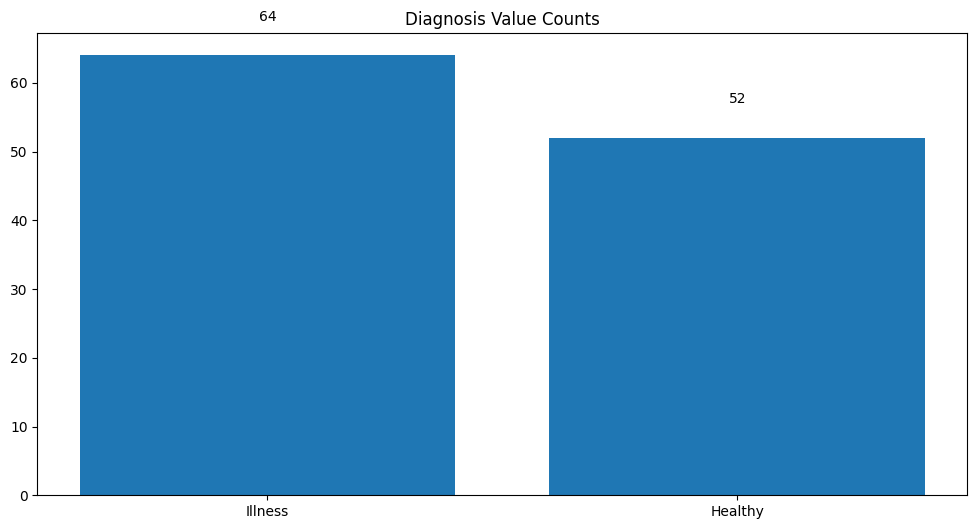

In [140]:
# Check for class imbalance.
value_counts = renamed_df["classification"].value_counts()
value_counts.index = value_counts.index.map({1: "Illness", 0: "Healthy"})

fig = plt.figure(figsize=(12, 6))
plt.bar(value_counts.index, value_counts.values)

for i, value in enumerate(value_counts.values):
    plt.text(i, value + 5, str(value), ha="center")

plt.title("Diagnosis Value Counts")
plt.show()

In [142]:
renamed_df.to_csv('data/breast-cancer-coimbra/full-data.csv', index=False)

Features to drop with correlation above 0.75 for all methods: ['homa']
Number of features before dropping: 10
Number of features after dropping: 9
Dropped features: ['homa']


,age,bmi,glucose,insulin,leptin,adiponectin,resistin,mcp_1,classification
0,48,23.500000,70,2.707,8.8071,9.702400,7.99585,417.114,0
1,83,20.690495,92,3.115,8.8438,5.429285,4.06405,468.786,0
2,82,23.124670,91,4.498,17.9393,22.432040,9.27715,554.697,0
3,68,21.367521,77,3.226,9.8827,7.169560,12.76600,928.220,0
4,86,21.111111,92,3.549,6.6994,4.819240,10.57635,773.920,0
...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,54.6800,12.100000,10.96000,268.230,1
112,62,26.840000,100,4.530,12.4500,21.420000,7.32000,330.160,1
113,65,32.050000,97,5.730,61.4800,22.540000,10.33000,314.050,1
114,72,25.590000,82,2.820,24.9600,33.750000,3.27000,392.460,1


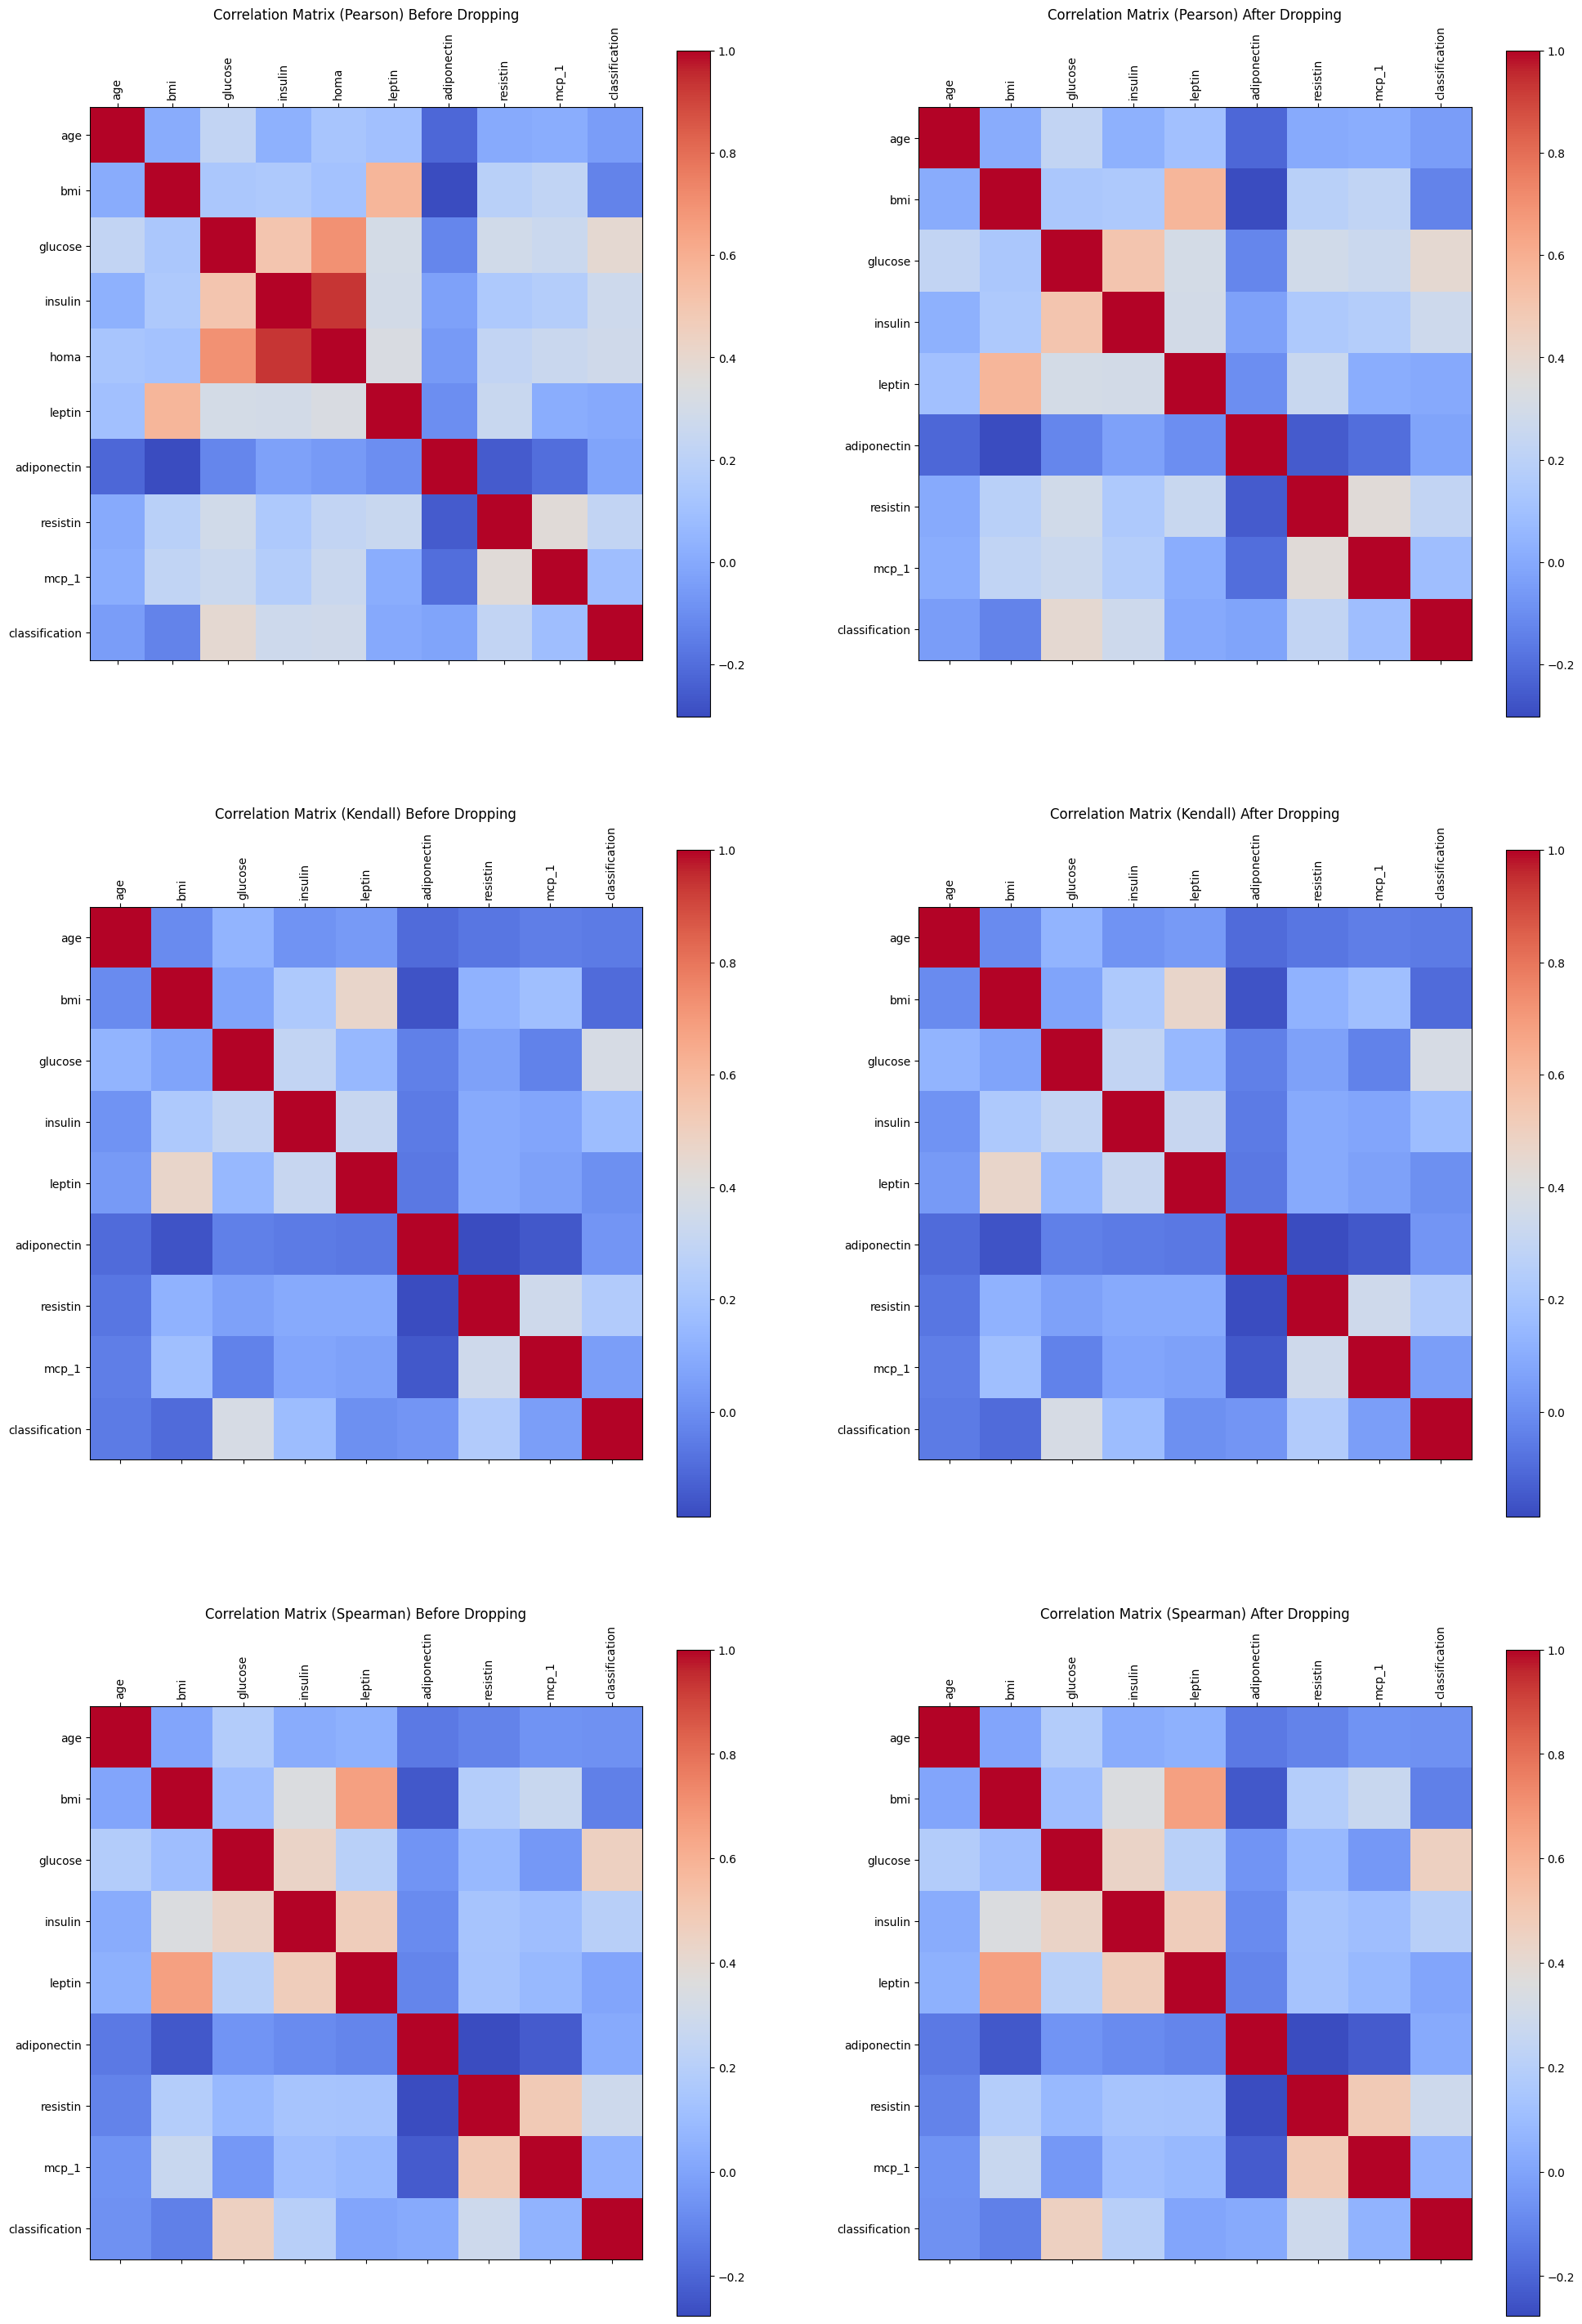

In [146]:
# Plot correlation matrices and drop highly correlated features
threshold = 0.75
dropped_df = drop_correlated_features(renamed_df, threshold=threshold)
show_comparison_correlation_matrices(renamed_df, dropped_df, threshold=threshold)
dropped_df

In [147]:
dropped_df.to_csv('data/breast-cancer-coimbra/no-correlation.csv', index=False)

In [152]:
dropped_df = pd.read_csv('data/breast-cancer-coimbra/no-correlation.csv')

In [154]:
# Normalize data except for diagnosis column
normalized_df = dropped_df.copy()
normalized_df.iloc[:, :-1] = (normalized_df.iloc[:, :-1] - normalized_df.iloc[:, :-1].mean()) / normalized_df.iloc[:, :-1].std()
normalized_df.describe()

/var/folders/fn/38xqs2vn57nfbhftm0zv8gv80000gn/T/ipykernel_9236/4100051287.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0     -0.577289
1      1.594902
2      1.532839
3      0.663963
4      1.781089
         ...   
111   -0.763477
112    0.291587
113    0.477775
114    0.912213
115    1.781089
Name: age, Length: 116, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  normalized_df.iloc[:, :-1] = (normalized_df.iloc[:, :-1] - normalized_df.iloc[:, :-1].mean()) / normalized_df.iloc[:, :-1].std()
/var/folders/fn/38xqs2vn57nfbhftm0zv8gv80000gn/T/ipykernel_9236/4100051287.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0     -1.233869
1     -0.257184
2     -0.301578
3     -0.923106
4     -0.257184
         ...   
111   -0.257184
112    0.097975
113   -0.035210
114   -0.701132
115    1

,age,bmi,glucose,insulin,leptin,adiponectin,resistin,mcp_1,classification
count,1.160000e+02,1.160000e+02,1.160000e+02,1.160000e+02,1.160000e+02,1.160000e+02,1.160000e+02,1.160000e+02,116.000000
mean,1.320783e-16,-6.097852e-16,1.799327e-16,2.584140e-17,1.263357e-16,1.148507e-17,2.354438e-16,-1.071939e-16,0.551724
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.499475
min,-2.066791e+00,-1.835032e+00,-1.677817e+00,-7.529064e-01,-1.162682e+00,-1.245715e+00,-9.294081e-01,-1.413085e+00,0.000000
25%,-7.634769e-01,-9.180839e-01,-5.346511e-01,-5.614786e-01,-7.455135e-01,-6.877622e-01,-6.330746e-01,-7.651317e-01,0.000000
50%,-8.078837e-02,1.599667e-02,-2.571837e-01,-4.060072e-01,-3.307086e-01,-2.671475e-01,-3.146104e-01,-1.830650e-01,1.000000
75%,8.501505e-01,7.289308e-01,1.867643e-01,1.169240e-01,5.610726e-01,2.389324e-01,2.444781e-01,4.782652e-01,1.000000
max,1.967277e+00,2.190508e+00,4.581849e+00,4.812180e+00,3.318769e+00,4.070983e+00,5.437492e+00,3.364413e+00,1.000000


In [155]:
normalized_df.to_csv('data/breast-cancer-coimbra/normalized.csv', index=False)